# Kaggle Titanic Competition

In [10]:
%matplotlib inline

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
sample=pd.read_csv('gender_submission.csv')
sample.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [47]:
train_data=pd.read_csv(r'train.csv')
test_data=pd.read_csv(r'test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
test_data.index

RangeIndex(start=0, stop=418, step=1)

In [56]:
train_data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

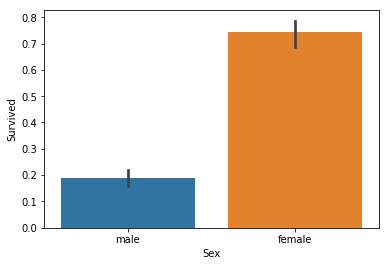

In [49]:
sns.barplot('Sex', 'Survived', data=train_data)

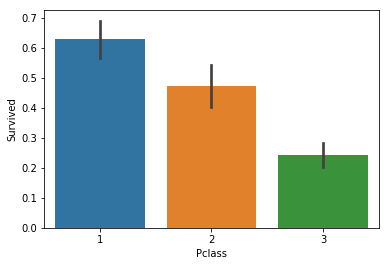

In [16]:
sns.barplot('Pclass', "Survived", data=train_data)

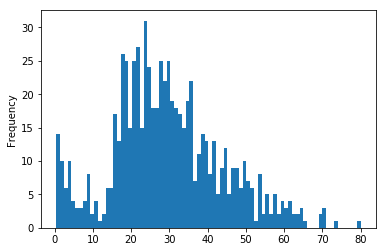

In [55]:
train_data['Age'].plot.hist(bins=80)

In [58]:
train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)

In [59]:
#male, femaleをone-hot表現で
sex=pd.get_dummies(train_data['Sex']) 
#前処理がいらなくて、重要そうな特徴量だけ選ぶ
X_train=train_data[['Pclass', 'SibSp', 'Parch', 'Fare', "Age"]].join(sex)
y_train=train_data['Survived']

LightGBM

In [39]:

import lightgbm as lgbm
 
# Scikit-learn（評価算出）
from sklearn.metrics import accuracy_score

In [60]:
lgb_params = {"objective":"binary", 
              "metric":"binary_error"}
lgb_train = lgbm.Dataset(
                 X_train, 
                 y_train)

lgb = lgbm.train(lgb_params, lgb_train)

#lgb.predict(X_train)

In [61]:
y_pred = lgb.predict(X_train)
y_pred=np.where(y_pred>=0.5,1,0)

acc=accuracy_score(y_train, y_pred)

In [62]:
#再代入正答率（学習に使ったデータに対してどれだけモデルがうまく適合しているかを確認する）
acc

0.9371492704826038

In [70]:
1310-892

418

In [64]:
#test submitの準備
sex=pd.get_dummies(test_data['Sex'])
X_test=test_data[['Pclass', 'SibSp', 'Parch', 'Fare', "Age"]].join(sex)

In [87]:
def df_submit(data):
    yy=lgb.predict(data)
    yy=np.where(yy>=0.5, 1, 0)
    id_=np.arange(892,1310)
    d_data={
            "PassengerId":id_,
            "Survived":yy
        }
    return pd.DataFrame(d_data)

In [88]:
sub_df=df_submit(X_test)

In [92]:
sub_df.to_csv('02042020submit.csv', index=False)